# Wavenet Demo
Demo of our efficient generation implementation.

Trains wavenet on a single wav file. Then generates that file, starting from a single sample.

In [1]:
#!pip install tensorflow==0.12

In [2]:
from time import time

from wavenet.utils import make_batch
from wavenet.models import Model, Generator

from IPython.display import Audio

%matplotlib inline

In [3]:
inputs, targets = make_batch('assets/cw_ag1le.wav',numclasses=64)
print (inputs.shape[1])
num_time_samples = inputs.shape[1]
num_channels = 1
gpu_fraction = 1.0

model = Model(num_time_samples=num_time_samples,
              num_classes=64,
              num_channels=num_channels,
              gpu_fraction=gpu_fraction)

Audio(inputs.reshape(inputs.shape[1]), rate=8000)

37698
Instructions for updating:
Use `tf.global_variables_initializer` instead.


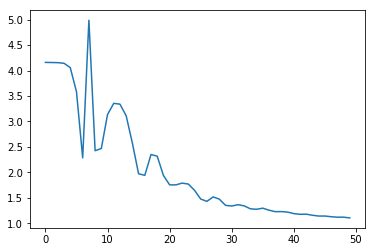

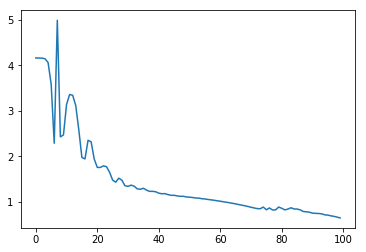

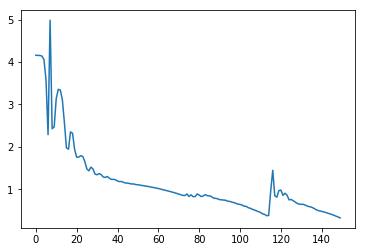

Training took 1551.3321936130524 seconds.


In [4]:
tic = time()
model.train(inputs, targets)
toc = time()

print('Training took {} seconds.'.format(toc-tic))

Make Generator.


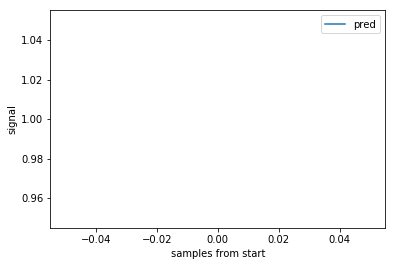

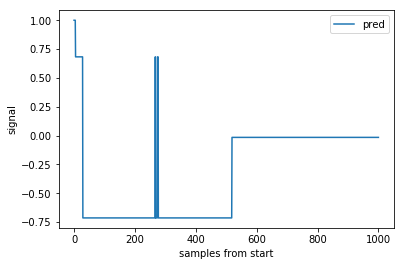

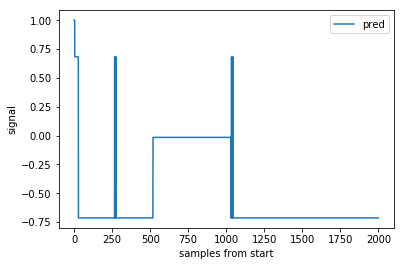

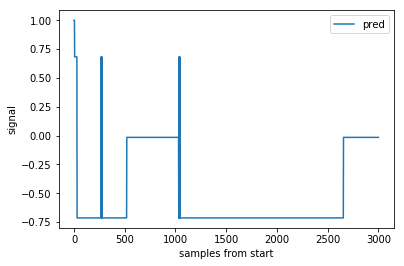

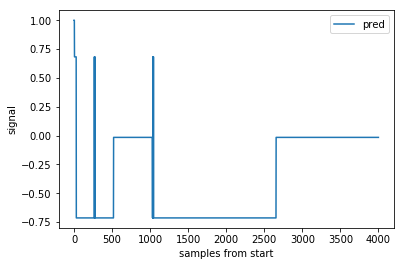

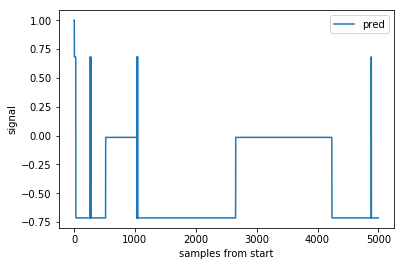

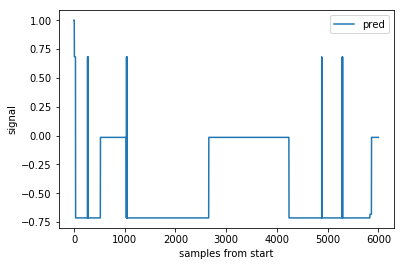

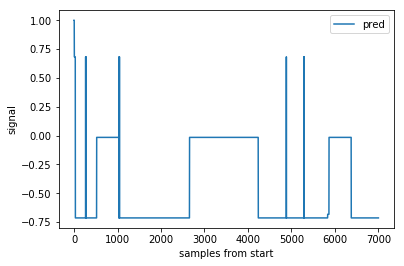

Generating took 7.957990884780884 seconds.


In [5]:
generator = Generator(model)

# Get first sample of input
input_ = inputs[:, 0:1, 0]

tic = time()
predictions = generator.run(input_, 8000)
toc = time()
print('Generating took {} seconds.'.format(toc-tic))

In [6]:
Audio(predictions, rate=8000)

In [7]:
type(predictions[0])

numpy.ndarray

In [8]:
from scipy.io import wavfile
wavfile.write("cw-1sec_gen.wav",rate=8000,data=predictions[0])

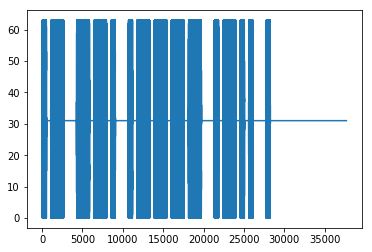

In [9]:
import matplotlib.pyplot as plt
plt.plot(targets[0])

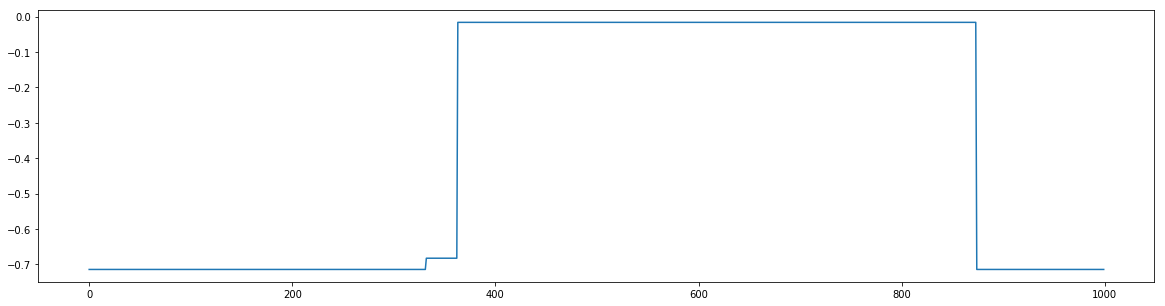

In [53]:
plt.figure(figsize=(20,5))
plt.plot(predictions[0,5500:6500])